In [1]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv')

In [3]:
print(dataset)

     Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0             1   9.50        138      73           11         276    120   
1             2  11.22        111      48           16         260     83   
2             3  10.06        113      35           10         269     80   
3             4   7.40        117     100            4         466     97   
4             5   4.15        141      64            3         340    128   
..          ...    ...        ...     ...          ...         ...    ...   
395         396  12.57        138     108           17         203    128   
396         397   6.14        139      23            3          37    120   
397         398   7.41        162      26           12         368    159   
398         399   5.94        100      79            7         284     95   
399         400   9.71        134      37            0          27    120   

    ShelveLoc  Age  Education Urban   US  
0         Bad   42         17   

10a)

In [4]:
y,x = dmatrices('Sales ~ Price + Urban +  US ', data=dataset, return_type='dataframe')

In [5]:
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        02:04:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

10b)Urban has a very high p value thus we cannot reject the null hypothesis for urban
10c)y=-0.0219x1+1.2006x2-0.0545x3
10d)Urban

In [6]:
#10e
ys,xs=dmatrices('Sales ~ Price+ US', data=dataset, return_type='dataframe')

In [7]:
mod2=sm.OLS(ys,xs)
res2=mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        02:04:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
pred=res.fittedvalues

In [9]:
model_residuals = res.resid#calc residual

In [10]:
model_norm_residuals =res.get_influence().resid_studentized_internal

In [11]:
model_leverage = res.get_influence().hat_matrix_diag

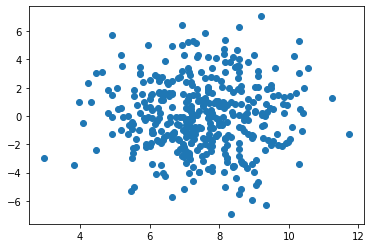

In [12]:
#10f)
plt.scatter(pred,model_residuals)

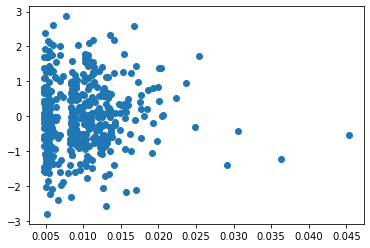

In [13]:
plt.scatter(model_leverage,model_norm_residuals)

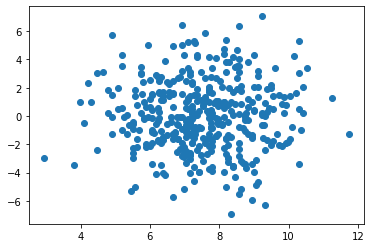

In [14]:
pred2=res2.fittedvalues
model_residuals2 = res2.resid#calc residual
model_norm_residuals2 =res2.get_influence().resid_studentized_internal
model_leverage2 = res2.get_influence().hat_matrix_diag
plt.scatter(pred2,model_residuals2)


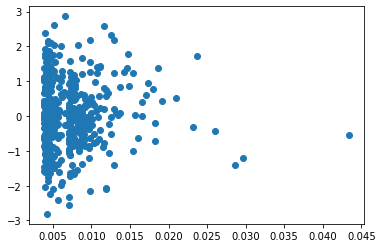

In [15]:
plt.scatter(model_leverage2,model_norm_residuals2)

In [16]:
#10g)
res.conf_int(alpha=0.05)

,0,1
Intercept,11.763597,14.323341
Urban[T.Yes],-0.555973,0.512141
US[T.Yes],0.691304,1.709841
Price,-0.064764,-0.044154


In [17]:
res2.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


10h)yes from the std residual vs leverage graph,we can see points which have exceptionally high leverage.Now avg leverage =(2+1)/400=0.0075..so there are many points having high leverage
for outliers there are many points above and below  the range of -2 to +2,they might be possible outliers.